In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df_insurance = pd.read_csv('c:\\Users\\Luis\\Downloads\\insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [3]:
df_insurance.shape

(1338, 7)

In [4]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Descriptive analysis**

In [5]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


On the charges column, the **mean** is significantly higher than the **median**, this suggests there are **outliers** (extremely high medical expenses) pulling the average up.

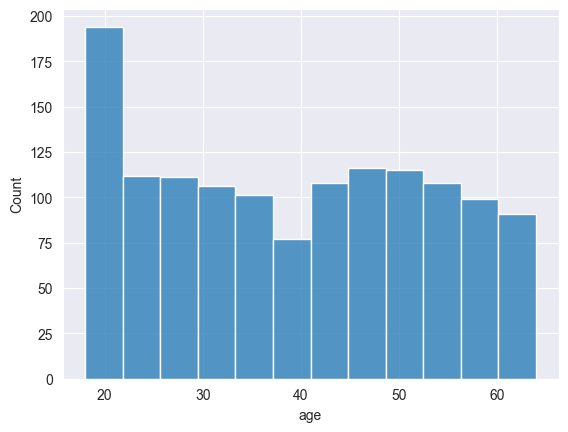

In [6]:
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_insurance, x='age')

plt.show()

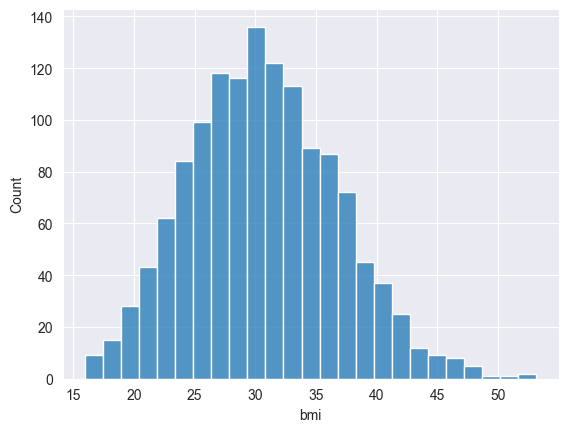

In [7]:
sns.set_style('darkgrid')
plt.tight_layout()

sns.histplot(data=df_insurance, x= 'bmi')

plt.show()


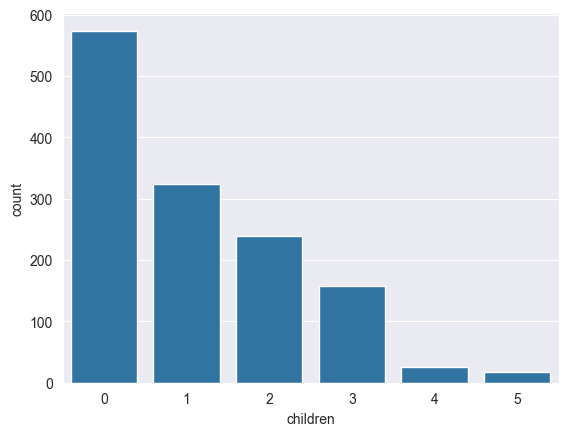

In [8]:
sns.set_style('darkgrid')
plt.tight_layout()

sns.countplot(data=df_insurance, x= 'children')

plt.show()

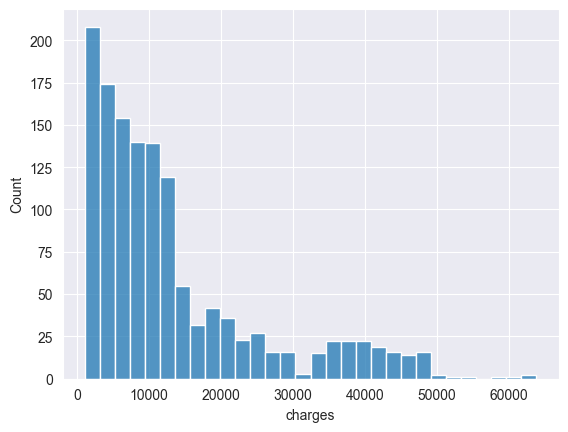

In [9]:
sns.set_style('darkgrid')
plt.tight_layout()

sns.histplot(data=df_insurance, x= 'charges')

plt.show()

- The histogram shows that insurance charges are heavily concentrated at the lower end of the scale.
- We can assume this is due to a higher number of younger individuals in the dataset, particularly those in their 20s.
- This age group typically incurs lower medical costs, which explains the lower charges.
- It also aligns with the observed distribution of the **number of children**, which tends to be smaller among younger policyholders.

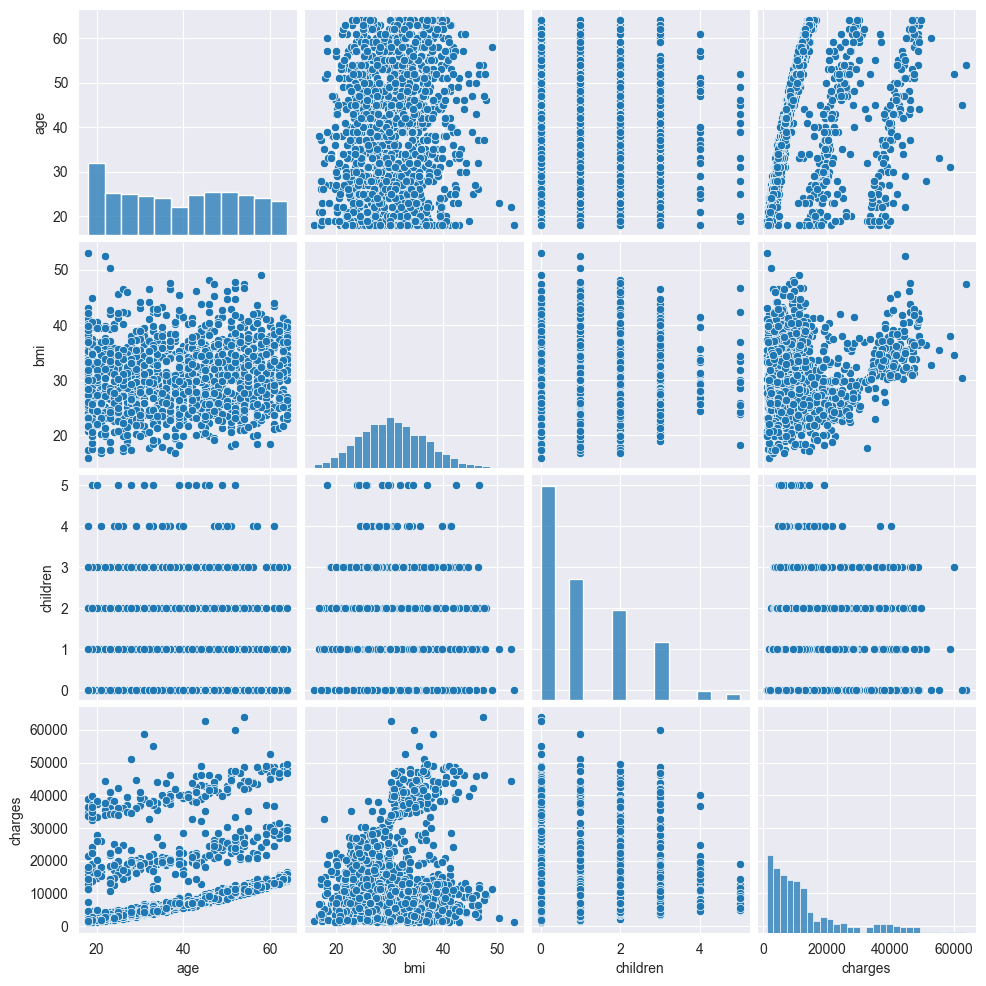

In [10]:
sns.pairplot(data=df_insurance)
plt.show()

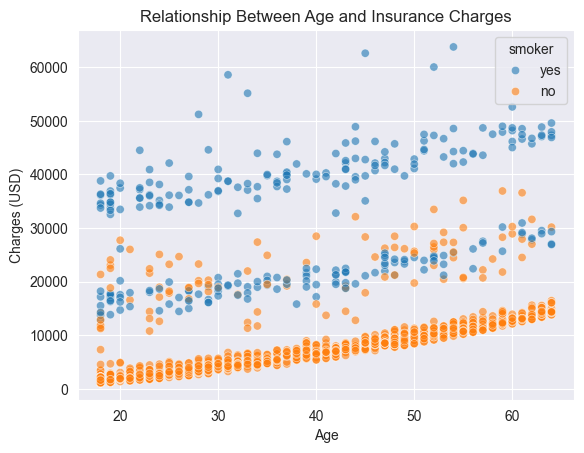

In [11]:
sns.set_style('darkgrid')
plt.tight_layout()

sns.scatterplot(data=df_insurance, x= 'age', y= 'charges', hue= 'smoker', alpha= 0.6)

plt.title('Relationship Between Age and Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges (USD)')
plt.show()



This scatter plot shows the relationship between a customer's **age** and their **insurance charges**, separated by **smoking status**.
- **Key observations**:
  - **Non-smokers** (orange dots) tend to have relatively lower insurance charges across all ages.
  - **Smokers** (blue dots) consistently have **much higher charges**, regardless of their age.
- **Age Influence**:
  - For non-smokers, insurance charges increase steadily with age, reflecting higher expected healthcare costs as people get older.
  - For smokers, charges start high even at younger ages and remain elevated across the entire age range.
- **Outliers**:
  - There are several smokers with extremely high charges (above \$50,000), highlighting how smoking drastically impacts insurance risk assessment.
- **Conclusion**:
  - **Smoking status** is a major factor influencing insurance charges — more significant than age alone.
  - **Age** does have an effect, but smoking **amplifies** the baseline cost substantially.


In [12]:
df_insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


### Preparing Categorical Variables

- Most machine learning models are unable to interpret categorical variables directly.
- Therefore, we must encode the following variables before training:
  - `sex`
  - `smoker`
  - `region`


In [13]:
df_insurance['female'] = df_insurance['sex'].map({'female': 1, 'male': 0})
df_insurance['smoker'] = df_insurance['smoker'].map({'yes': 1, 'no': 0})

df_insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [14]:

df_insurance.drop('sex', axis=1, inplace=True)
df_insurance.head()

,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [15]:
column_region = pd.get_dummies(df_insurance['region'], drop_first=True).astype(int)
column_region.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [16]:
df_insurance = pd.concat([df_insurance, column_region], axis=1)
df_insurance.head()

,age,bmi,children,smoker,region,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,0,0,1
1,18,33.77,1,0,southeast,1725.55,0,0,1,0
2,28,33.00,3,0,southeast,4449.46,0,0,1,0
3,33,22.70,0,0,northwest,21984.47,0,1,0,0
4,32,28.88,0,0,northwest,3866.86,0,1,0,0


In [17]:
df_insurance.drop('region', axis=1, inplace=True)
df_insurance.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


In [50]:
# Independent variable
X = df_insurance.drop('charges', axis=1)

# Dependent variable
y = df_insurance['charges']


###  Splitting the Dataset into Training and Testing Sets

- We are using the `train_test_split` function to divide the dataset into:
  - **Training data** (`X_train`, `y_train`) — 80% of the samples
  - **Testing data** (`X_test`, `y_test`) — 20% of the samples
- This step is important to avoid overfitting and check generalization.
- The parameter `random_state=42` is used to ensure that the split is reproducible ( the same split will happen every time the code runs).

After the split, we check the shape of the training and testing sets to confirm the number of rows in each group.


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size= .2, random_state= 42)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1070, 8), (268, 8), (1070,), (268,))

In [21]:
1070/1338

0.7997010463378177

## <a> Feature Scaling </a>

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler

MinMaxScaler()

In [23]:
columns = X_treino.columns

X_treino[columns] = scaler.fit_transform(X_treino)
X_teste[columns] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

((1070, 8), (268, 8))

In [24]:
X_treino.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [25]:
X_treino.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [26]:
X_teste.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


<Axes: >

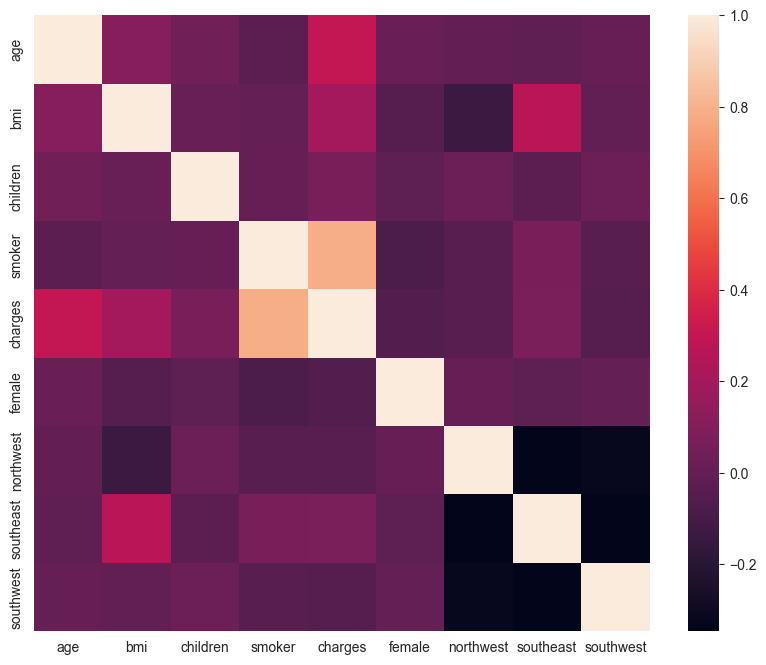

In [27]:
figura, graficos = plt.subplots(figsize=(10, 8))
corr = df_insurance.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            square=True, ax=graficos)

In [28]:
df_insurance.isnull().sum()

age          0
bmi          0
children     0
smoker       0
charges      0
female       0
northwest    0
southeast    0
southwest    0
dtype: int64

### Model Selection and Evaluation Strategy

- We are using **Linear Regression** as our base predictive model.
- To obtain a more reliable evaluation and minimize the risk of overfitting to a single train/test split, we apply **cross-validation**.
- Cross-validation allows the model to be trained and validated on different subsets of the data, providing a more stable estimate of its true performance.


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_regression = LinearRegression()

valores_rmse_rl = cross_val_score(estimator=linear_regression, X= X_treino, y= y_treino, cv= 10, scoring= 'neg_root_mean_squared_error')

valores_rmse_rl

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [30]:
valores_rmse_rl = valores_rmse_rl * - 1
valores_rmse_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [31]:
mean_valores_rmse_rl = valores_rmse_rl.mean()
mean_valores_rmse_rl

np.float64(6133.0839262055)

### Decision Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()


valores_rmse_dtr = cross_val_score(estimator=dtr, X=X_treino, y=y_treino, cv=10, scoring='neg_root_mean_squared_error')

valores_rmse_dtr.mean() *-1

np.float64(6853.406048842233)

### Feature Selection: Dropping the 'Region' Columns

- In the correlation analysis, the `region` feature showed little to no relationship with the target variable `charges`.
- Keeping features that do not contribute to prediction can introduce unnecessary noise into the model.
- Therefore, we are removing the `region` variable to simplify the model and focus on the most relevant predictors.


In [33]:
region_columns = ['northwest', 'southeast', 'southwest']

valores_rmse_dtr_sem_regiao = cross_val_score(estimator=dtr, X=X_treino.drop(region_columns, axis=1), y=y_treino, cv=10, scoring='neg_root_mean_squared_error')

valores_rmse_dtr_sem_regiao.mean() *-1

np.float64(6862.88032221182)

In [34]:
valores_rmse_rl_sem_regiao = cross_val_score(estimator=linear_regression, X=X_treino.drop(region_columns, axis=1), y=y_treino, cv=10, scoring='neg_root_mean_squared_error')

valores_rmse_rl_sem_regiao.mean() *-1

np.float64(6121.54506259713)

In [35]:
valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao *-1
valores_rmse_dtr = valores_rmse_dtr *-1

<Axes: >

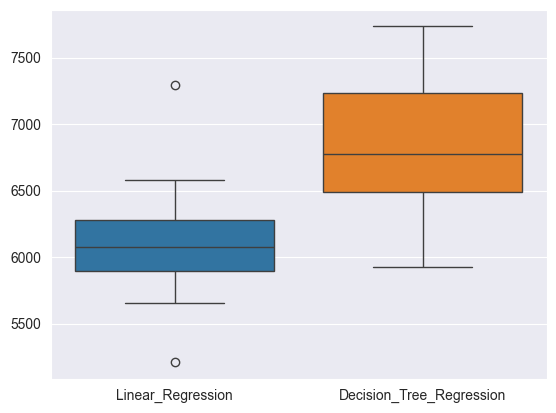

In [36]:
rmse = pd.DataFrame({'Linear_Regression': valores_rmse_rl_sem_regiao, 'Decision_Tree_Regression': valores_rmse_dtr})

sns.boxplot(data=rmse)

In [37]:
linear_regression.fit(X_treino.drop(region_columns, axis=1), y=y_treino)

LinearRegression()

In [38]:
linear_regression.coef_

array([1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
       7.95178837e+00])

In [45]:
df_coef = pd.DataFrame({
    'feature': linear_regression.feature_names_in_,
    'coeficiente': linear_regression.coef_
})
df_coef

,feature,coeficiente
0,age,11825.17
1,bmi,12174.42
2,children,2136.27
3,smoker,23653.90
4,female,7.95


In [46]:
cost_price = linear_regression.predict(X=X_teste.drop(region_columns, axis=1))
cost_price[:5]

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081])

In [48]:
y_teste.head() #valor real

764     9095.07
887     5272.18
890    29330.98
1293    9301.89
259    33750.29
Name: charges, dtype: float64

In [47]:
predicts_vs_real = pd.DataFrame({'predict': cost_price.flatten(), 'real': y_teste.values.flatten()})
predicts_vs_real['absolute value'] = abs(predicts_vs_real['predict'] - predicts_vs_real['real'])
predicts_vs_real.head(15)

,predict,real,absolute value
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [49]:
from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=cost_price)

0.7811302113434095

##  Final Conclusion

In this project, we developed machine learning models to predict health insurance charges based on customer characteristics.  
Through data exploration and cleaning, we identified key factors such as **age**, **BMI**, and **smoking status** that heavily influence insurance costs.  

After encoding categorical variables, we trained both a **Linear Regression** model and a **Decision Tree Regression** model, applying **cross-validation** to evaluate their performance.  
Based on the evaluation results, **Linear Regression** was selected as the final model, achieving an R² score of **0.78**, indicating strong predictive performance.  


